In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
airbnb_path = "Resources/listings.csv"

airbnb_data = pd.read_csv(airbnb_path)

In [3]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,2021-05-04,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,2014-01-02,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,2020-09-25,3.61,1,246


In [4]:
airbnb_data.count()

id                                36230
name                              36216
host_id                           36230
host_name                         36204
neighbourhood_group               36230
neighbourhood                     36230
latitude                          36230
longitude                         36230
room_type                         36230
price                             36230
minimum_nights                    36230
number_of_reviews                 36230
last_review                       26772
reviews_per_month                 26772
calculated_host_listings_count    36230
availability_365                  36230
dtype: int64

In [5]:
airbnb_data[airbnb_data['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65,30,0,NaN,NaN,2,365
12,7750,2 Furnished bedrooms next to Central Park,17985,Sing,Manhattan,East Harlem,40.796070,-73.949490,Private room,96,30,0,NaN,NaN,2,178
20,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.637020,-73.963270,Private room,150,30,0,NaN,NaN,1,0
100,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.806350,-73.922010,Private room,60,30,0,NaN,NaN,1,83
106,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.774490,-73.953080,Private room,130,14,0,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36225,50164369,Fully Furnished Cozy Room in Upper West Side Home,305240193,June,Manhattan,Upper West Side,40.798766,-73.964027,Private room,76,30,0,NaN,NaN,283,1
36226,50165159,Fully Furnished Modern Room in West Harlem Home,305240193,June,Manhattan,Harlem,40.811334,-73.954073,Private room,58,30,0,NaN,NaN,283,307
36227,50165711,Furnished Sunlit Room in Lower East Side Apart...,305240193,June,Manhattan,Chinatown,40.715412,-73.992864,Private room,74,30,0,NaN,NaN,283,304
36228,50165885,"Classic Flatiron 2BR w/ W/D, Elevator, near Ea...",107434423,Blueground,Manhattan,Flatiron District,40.743279,-73.991203,Entire home/apt,281,30,0,NaN,NaN,278,299


In [6]:
airbnb_data = airbnb_data.dropna(how='any')

In [7]:
airbnb_data.count()

id                                26748
name                              26748
host_id                           26748
host_name                         26748
neighbourhood_group               26748
neighbourhood                     26748
latitude                          26748
longitude                         26748
room_type                         26748
price                             26748
minimum_nights                    26748
number_of_reviews                 26748
last_review                       26748
reviews_per_month                 26748
calculated_host_listings_count    26748
availability_365                  26748
dtype: int64

In [8]:
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
airbnb_renamed = airbnb_data.rename(columns={"host_id": "host id",
                                             "host_name": "host name",
                                             "neighbourhood_group": "neighbourhood group",
                                             "room_type": "room type", 
                                             "minimum_nights": "minimum nights",
                                             "number_of_reviews": "number of reviews",
                                             "last_review": "last review",
                                             "reviews_per_month": "reviews per month",
                                             "calculated_host_listings_count": "host listings count",
                                             "availability_365": "availability 365"})

airbnb_renamed.head()

,id,name,host id,host name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number of reviews,last review,reviews per month,host listings count,availability 365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,2021-05-04,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,2014-01-02,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,2020-09-25,3.61,1,246


In [10]:
airbnb_cleaned = airbnb_renamed[["name", "neighbourhood group", "neighbourhood", "minimum nights"]]

airbnb_cleaned

,name,neighbourhood group,neighbourhood,minimum nights
0,Skylit Midtown Castle,Manhattan,Midtown,30
1,"Whole flr w/private bdrm, bath & kitchen(pls r...",Brooklyn,Bedford-Stuyvesant,1
2,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,30
3,"Spacious Brooklyn Duplex, Patio + Garden",Brooklyn,Sunset Park,21
4,Large Furnished Room Near B'way,Manhattan,Midtown,2
...,...,...,...,...
36021,Shared room in Manhattan,Manhattan,Hell's Kitchen,2
36022,"Luxury battery park studio , for women only!!",Manhattan,Financial District,1
36053,Comfortable and Private 1 Bedroom Guest Suite,Queens,Fresh Meadows,2
36100,THE NEWBIT HOME BK - Cozy Getaway w Private Pa...,Brooklyn,East Flatbush,1


In [11]:
airbnb_group = airbnb_cleaned.groupby(["neighbourhood group"])

airbnb_averages = airbnb_group.mean()

airbnb_averages

,minimum nights
neighbourhood group,
Bronx,13.815894
Brooklyn,20.302019
Manhattan,23.336198
Queens,17.405209
Staten Island,12.094488


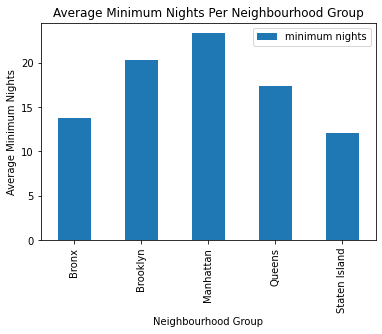

In [12]:
airbnb_bar = airbnb_averages.plot(kind= 'bar', title= "Average Minimum Nights Per Neighbourhood Group")

airbnb_bar.set_xlabel("Neighbourhood Group")
airbnb_bar.set_ylabel("Average Minimum Nights")

plt.savefig("Average Minimum Nights Per Neighbourhood Group")

plt.show()

In [13]:
#Manhattan has the highest average of minimum nights required 
#per stay compared to the rest of major NYC neighbourhood groups.

In [14]:
airbnb_edit = airbnb_renamed[["name", "neighbourhood group", "neighbourhood", "minimum nights", "availability 365"]]

airbnb_edit

,name,neighbourhood group,neighbourhood,minimum nights,availability 365
0,Skylit Midtown Castle,Manhattan,Midtown,30,308
1,"Whole flr w/private bdrm, bath & kitchen(pls r...",Brooklyn,Bedford-Stuyvesant,1,208
2,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,30,365
3,"Spacious Brooklyn Duplex, Patio + Garden",Brooklyn,Sunset Park,21,134
4,Large Furnished Room Near B'way,Manhattan,Midtown,2,246
...,...,...,...,...,...
36021,Shared room in Manhattan,Manhattan,Hell's Kitchen,2,178
36022,"Luxury battery park studio , for women only!!",Manhattan,Financial District,1,30
36053,Comfortable and Private 1 Bedroom Guest Suite,Queens,Fresh Meadows,2,264
36100,THE NEWBIT HOME BK - Cozy Getaway w Private Pa...,Brooklyn,East Flatbush,1,148


In [15]:
airbnb_nbhd = airbnb_edit.groupby(["neighbourhood group", "neighbourhood"])

airbnb_nbhd.head()

sum_up = airbnb_nbhd.mean()

sum_up.head()

minimum nights  availability 365
neighbourhood group neighbourhood                                  
Bronx               Allerton            10.250000        184.791667
                    Baychester           7.272727        212.272727
                    Belmont             16.166667         78.500000
                    Bronxdale           22.187500        123.562500
                    Castle Hill          1.000000        307.000000

In [16]:
target = "Manhattan"

target_nbhd = sum_up.loc[target]

In [17]:
manhat_avail= target_nbhd["availability 365"]

manhat_min= target_nbhd["minimum nights"]

<function matplotlib.pyplot.show(close=None, block=None)>

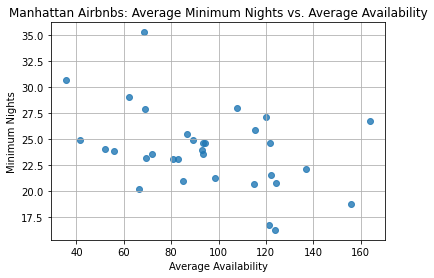

In [18]:
plt.scatter(manhat_avail,
            manhat_min,
            linewidths = 1,
            marker= "o",
            alpha = 0.8,
            label = "neighbourhood")

plt.title("Manhattan Airbnbs: Average Minimum Nights vs. Average Availability")
plt.ylabel("Minimum Nights")
plt.xlabel("Average Availability")
plt.grid(True)

plt.show

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(manhat_avail, manhat_min)

regress_values = manhat_avail * slope + intercept
print(regress_values)

neighbourhood
Battery Park City      25.234051
Chelsea                23.971271
Chinatown              25.367229
Civic Center           24.442064
East Harlem            23.760061
East Village           25.875406
Financial District     22.644839
Flatiron District      22.618306
Gramercy               24.361443
Greenwich Village      25.251239
Harlem                 22.958095
Hell's Kitchen         21.873407
Inwood                 24.542129
Kips Bay               23.300055
Little Italy           22.486227
Lower East Side        25.211416
Marble Hill            22.510840
Midtown                22.594342
Morningside Heights    26.890153
Murray Hill            20.521916
NoHo                   26.600739
Nolita                 26.078506
Roosevelt Island       22.701613
SoHo                   24.033349
Stuyvesant Town        24.232481
Theater District       20.925519
Tribeca                24.652989
Two Bridges            25.565982
Upper East Side        22.921967
Upper West Side        24.009

In [20]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.05x +28.65


The r-value is: 0.16256538933666795


<function matplotlib.pyplot.show(close=None, block=None)>

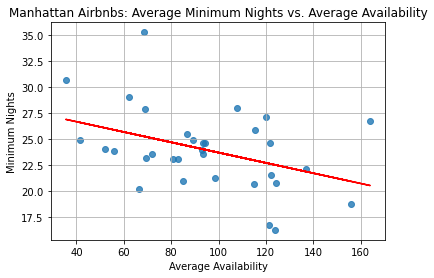

In [21]:
plt.scatter(manhat_avail,
            manhat_min,
            linewidths = 1,
            marker= "o",
            alpha = 0.8,
            label = "neighbourhood")

plt.plot(manhat_avail, regress_values, "r-")

plt.title("Manhattan Airbnbs: Average Minimum Nights vs. Average Availability")
plt.ylabel("Minimum Nights")
plt.xlabel("Average Availability")
plt.grid(True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("Manhattan Airbnbs: Linear Regression")

plt.show

In [22]:
#Average minimum night stay requirements seem to generally decrease 
#with increasing yearly availability.